In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500
)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# 케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩을 추가
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
# LSTM 셀을 사용한 순환층을 만들기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 166, input_length=100))
model.add(keras.layers.LSTM(8)) # 전 장에서 사용했던 simpleRNN 대신 LSTM으로 바꿔주기만 하면 끝
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 166)          83000     
                                                                 
 lstm (LSTM)                 (None, 8)                 5600      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 88,609
Trainable params: 88,609
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoing_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoing_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 58ms/step - loss: 0.6852 - accuracy: 0.6134 - val_loss: 0.6751 - val_accuracy: 0.6584
Epoch 2/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6487 - accuracy: 0.6921 - val_loss: 0.6146 - val_accuracy: 0.7152
Epoch 3/100
313/313 [==============================] - 22s 71ms/step - loss: 0.5618 - accuracy: 0.7510 - val_loss: 0.5478 - val_accuracy: 0.7470
Epoch 4/100
313/313 [==============================] - 30s 97ms/step - loss: 0.5207 - accuracy: 0.7703 - val_loss: 0.5215 - val_accuracy: 0.7674
Epoch 5/100
313/313 [==============================] - 29s 92ms/step - loss: 0.4978 - accuracy: 0.7825 - val_loss: 0.4994 - val_accuracy: 0.7780
Epoch 6/100
313/313 [==============================] - 18s 58ms/step - loss: 0.4802 - accuracy: 0.7923 - val_loss: 0.5091 - val_accuracy: 0.7690
Epoch 7/100
313/313 [==============================] - 18s 57ms/step - loss: 0.4696 - accuracy: 0.7952 - val_loss: 0.4900 - val_ac

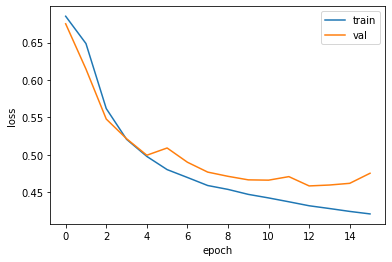

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
"""
  dropout 매개변수는 셀의 입력에 드롭아웃을 적용
  recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용
  |
  --> 단점 : GPU를 사용하여 모델을 훈련하지 못한다.
"""

#dropout만을 사용해 구현
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 15, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
from sklearn.utils import validation
from numpy import True_
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoing_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoing_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 42ms/step - loss: 0.6926 - accuracy: 0.5311 - val_loss: 0.6923 - val_accuracy: 0.5404
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6911 - accuracy: 0.5932 - val_loss: 0.6902 - val_accuracy: 0.5908
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6869 - accuracy: 0.6170 - val_loss: 0.6832 - val_accuracy: 0.6412
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6637 - accuracy: 0.6425 - val_loss: 0.6390 - val_accuracy: 0.6988
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6216 - accuracy: 0.7143 - val_loss: 0.6130 - val_accuracy: 0.7196
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6010 - accuracy: 0.7347 - val_loss: 0.5962 - val_accuracy: 0.7310
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5827 - accuracy: 0.7466 - val_loss: 0.5780 - val_ac

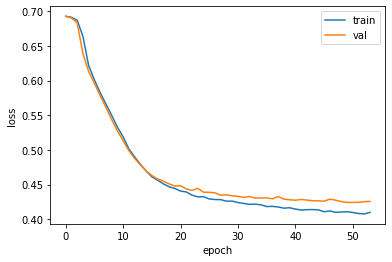

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
"""
  2개의 층을 연결하기
  순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다/
  --> 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 한다.
  모든 타임 스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 순환층에서
  -> return_sequences 매개변수를 True로 지정한다.
"""
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 15, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 15)           7500      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            768       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,821
Trainable params: 8,821
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.utils import validation
from numpy import True_
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoing_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoing_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 79ms/step - loss: 0.6930 - accuracy: 0.5129 - val_loss: 0.6928 - val_accuracy: 0.5062
Epoch 2/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6921 - accuracy: 0.5410 - val_loss: 0.6913 - val_accuracy: 0.5824
Epoch 3/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6887 - accuracy: 0.6029 - val_loss: 0.6849 - val_accuracy: 0.6376
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6660 - accuracy: 0.6482 - val_loss: 0.6299 - val_accuracy: 0.6700
Epoch 5/100
313/313 [==============================] - 23s 75ms/step - loss: 0.5877 - accuracy: 0.7165 - val_loss: 0.5636 - val_accuracy: 0.7290
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5483 - accuracy: 0.7376 - val_loss: 0.5290 - val_accuracy: 0.7554
Epoch 7/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5228 - accuracy: 0.7526 - val_loss: 0.5059 - val_ac

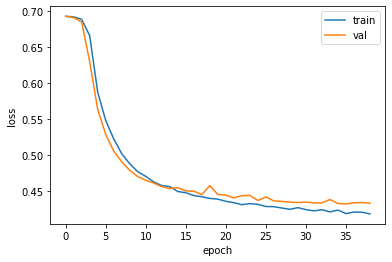

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
"""
  GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 낸다.
"""
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
"""
  GRU 셀의 계산은 좀 다르다.
  은닉 상태가 먼저 가중치와 곱해진 다음 가운데 셀의 출력과 곱해준다.
  - 이렇게 나누어 계산하면 별도의 절편이 필요하다.
    - 작은 셀마다 하나씩 절편이 추가되고 8개의 뉴련이 있으므로 24개의 모델 파라미터가 더해진다.
    - 16*8 + 8*8 + 8 + 8*3 = 624
"""
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
from sklearn.utils import validation
from numpy import True_
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoing_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoing_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6925 - accuracy: 0.5315 - val_loss: 0.6917 - val_accuracy: 0.5588
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6900 - accuracy: 0.5809 - val_loss: 0.6890 - val_accuracy: 0.5856
Epoch 3/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6863 - accuracy: 0.6049 - val_loss: 0.6849 - val_accuracy: 0.6068
Epoch 4/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6803 - accuracy: 0.6228 - val_loss: 0.6780 - val_accuracy: 0.6192
Epoch 5/100
313/313 [==============================] - 20s 62ms/step - loss: 0.6709 - accuracy: 0.6354 - val_loss: 0.6676 - val_accuracy: 0.6280
Epoch 6/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6560 - accuracy: 0.6496 - val_loss: 0.6504 - val_accuracy: 0.6434
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6316 - accuracy: 0.6672 - val_loss: 0.6205 - val_ac

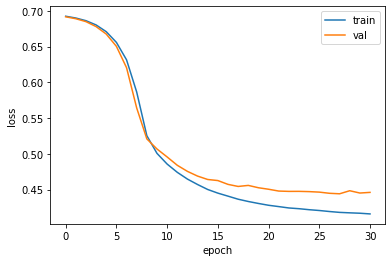

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
# LSTM과 GRU 셀로 훈련

test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 11s 13ms/step - loss: 0.4289 - accuracy: 0.8002


[0.42890089750289917, 0.8002399802207947]